# Testing the Emotion Detector model

In [446]:
import cv2
import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow
import zipfile

In [447]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [448]:
import tensorflow
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
tensorflow.__version__

'2.15.0'

##Connecting to Drive and accessing files

In [449]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [450]:
path = "/content/gdrive/My Drive/DIO/files.zip"
zip_object = zipfile.ZipFile(file = path, mode = "r")
zip_object.extractall('./')
zip_object.close

<bound method ZipFile.close of <zipfile.ZipFile filename='/content/gdrive/My Drive/DIO/files.zip' mode='r'>>

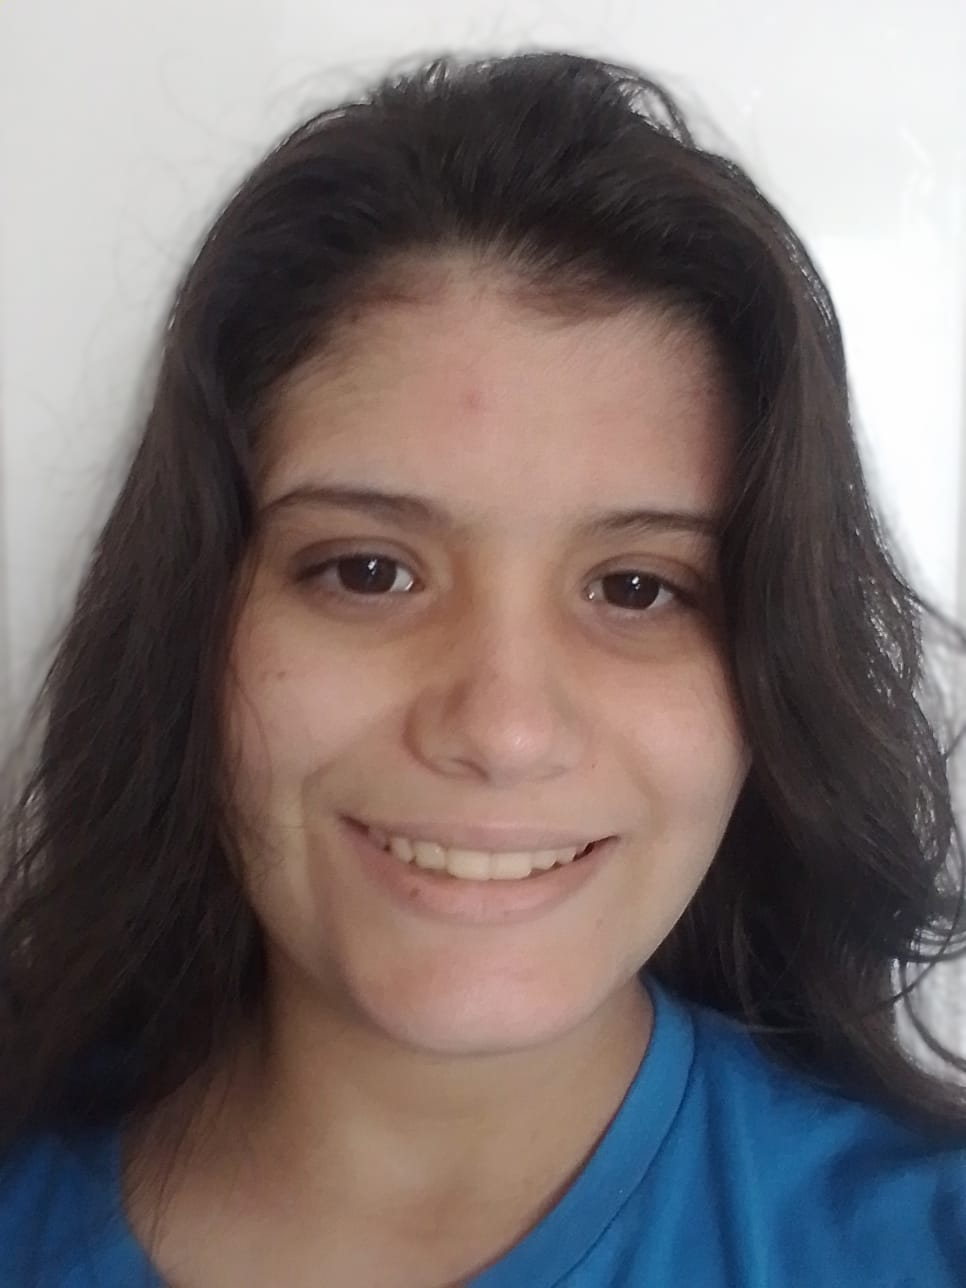

In [451]:
image = cv2.imread('/content/gdrive/My Drive/DIO/ImagemTeste.jpeg')
cv2_imshow(image)

In [452]:
image.shape

(1288, 966, 3)

##Testing the Detector

In [453]:
cascade_face = "Material/haarcascade_frontalface_default.xml"
model_path = "Material/modelo_01_expressoes.h5"
face_detection = cv2.CascadeClassifier(cascade_face)
emotions_classifier = load_model(model_path, compile = False)
expressions = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Suprise', 'Neutral']


##Face detection

In [454]:
original = image.copy()
faces = face_detection.detectMultiScale(original, scaleFactor = 1.1, minNeighbors = 3, minSize = (20, 20))

In [455]:
faces

array([[159, 336, 671, 671]], dtype=int32)

In [456]:
len(faces)

1

In [457]:
faces.shape

(1, 4)

##Extraction of ROI (region of interest)

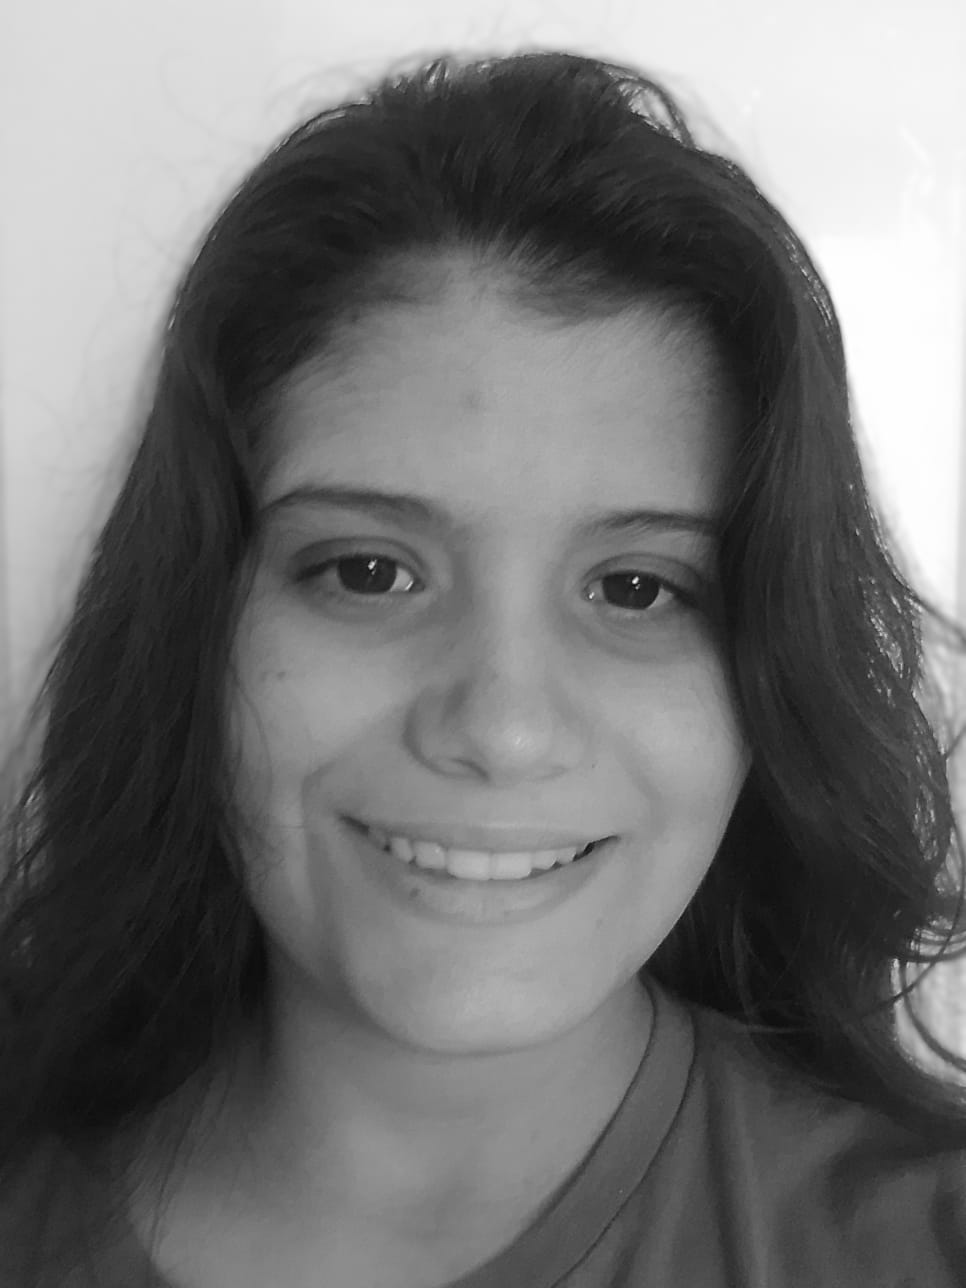

In [458]:
gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

In [460]:
gray.shape

(1288, 966)

In [461]:
roi = gray[40:40 + 1000, 162:162 + 600]

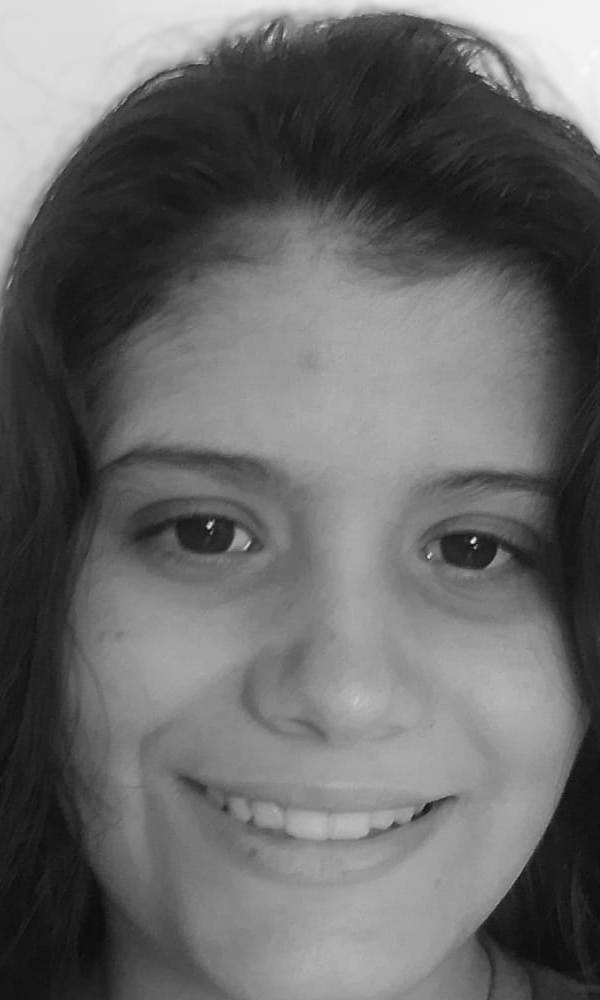

In [462]:
cv2_imshow(roi)

In [463]:
roi.shape

(1000, 600)

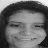

In [464]:
roi = cv2.resize(roi, (48, 48))
cv2_imshow(roi)

In [465]:
roi.dtype

dtype('uint8')

In [466]:
roi = roi.astype('float')
roi.dtype

dtype('float64')

In [467]:
roi

array([[218., 218., 220., ..., 240., 240., 241.],
       [219., 220., 220., ..., 241., 241., 241.],
       [215., 218., 219., ..., 239., 241., 247.],
       ...,
       [ 22.,  19.,  21., ...,  25.,  31.,  20.],
       [ 22.,  22.,  20., ...,  18.,  22.,  27.],
       [ 22.,  19.,  21., ...,  46.,  54.,  47.]])

In [468]:
roi = roi/255 ##normalization

In [469]:
roi

array([[0.85490196, 0.85490196, 0.8627451 , ..., 0.94117647, 0.94117647,
        0.94509804],
       [0.85882353, 0.8627451 , 0.8627451 , ..., 0.94509804, 0.94509804,
        0.94509804],
       [0.84313725, 0.85490196, 0.85882353, ..., 0.9372549 , 0.94509804,
        0.96862745],
       ...,
       [0.08627451, 0.0745098 , 0.08235294, ..., 0.09803922, 0.12156863,
        0.07843137],
       [0.08627451, 0.08627451, 0.07843137, ..., 0.07058824, 0.08627451,
        0.10588235],
       [0.08627451, 0.0745098 , 0.08235294, ..., 0.18039216, 0.21176471,
        0.18431373]])

In [470]:
roi = img_to_array(roi)

In [471]:
roi

array([[[0.85490197],
        [0.85490197],
        [0.8627451 ],
        ...,
        [0.9411765 ],
        [0.9411765 ],
        [0.94509804]],

       [[0.85882354],
        [0.8627451 ],
        [0.8627451 ],
        ...,
        [0.94509804],
        [0.94509804],
        [0.94509804]],

       [[0.84313726],
        [0.85490197],
        [0.85882354],
        ...,
        [0.9372549 ],
        [0.94509804],
        [0.96862745]],

       ...,

       [[0.08627451],
        [0.07450981],
        [0.08235294],
        ...,
        [0.09803922],
        [0.12156863],
        [0.07843138]],

       [[0.08627451],
        [0.08627451],
        [0.07843138],
        ...,
        [0.07058824],
        [0.08627451],
        [0.10588235]],

       [[0.08627451],
        [0.07450981],
        [0.08235294],
        ...,
        [0.18039216],
        [0.21176471],
        [0.18431373]]], dtype=float32)

In [472]:
roi.shape

(48, 48, 1)

In [473]:
roi = np.expand_dims(roi, axis = 0)

In [474]:
roi.shape

(1, 48, 48, 1)

##Predictions

In [475]:
preds = emotions_classifier = emotions_classifier.predict(roi)[0]

1/1 [==============================] - 0s 229ms/step


In [ ]:
preds

array([5.3093706e-12, 2.4239449e-20, 1.4483823e-11, 1.0000000e+00,
       2.1233817e-11, 1.0319541e-11, 7.5939113e-09], dtype=float32)

In [476]:
len(preds)

7

In [477]:
emotions_probability = np.max(preds)
emotions_probability

1.0

In [478]:
preds.argmax()

3

In [479]:
label = expressions[preds.argmax()]
label

'Happy'

##Results

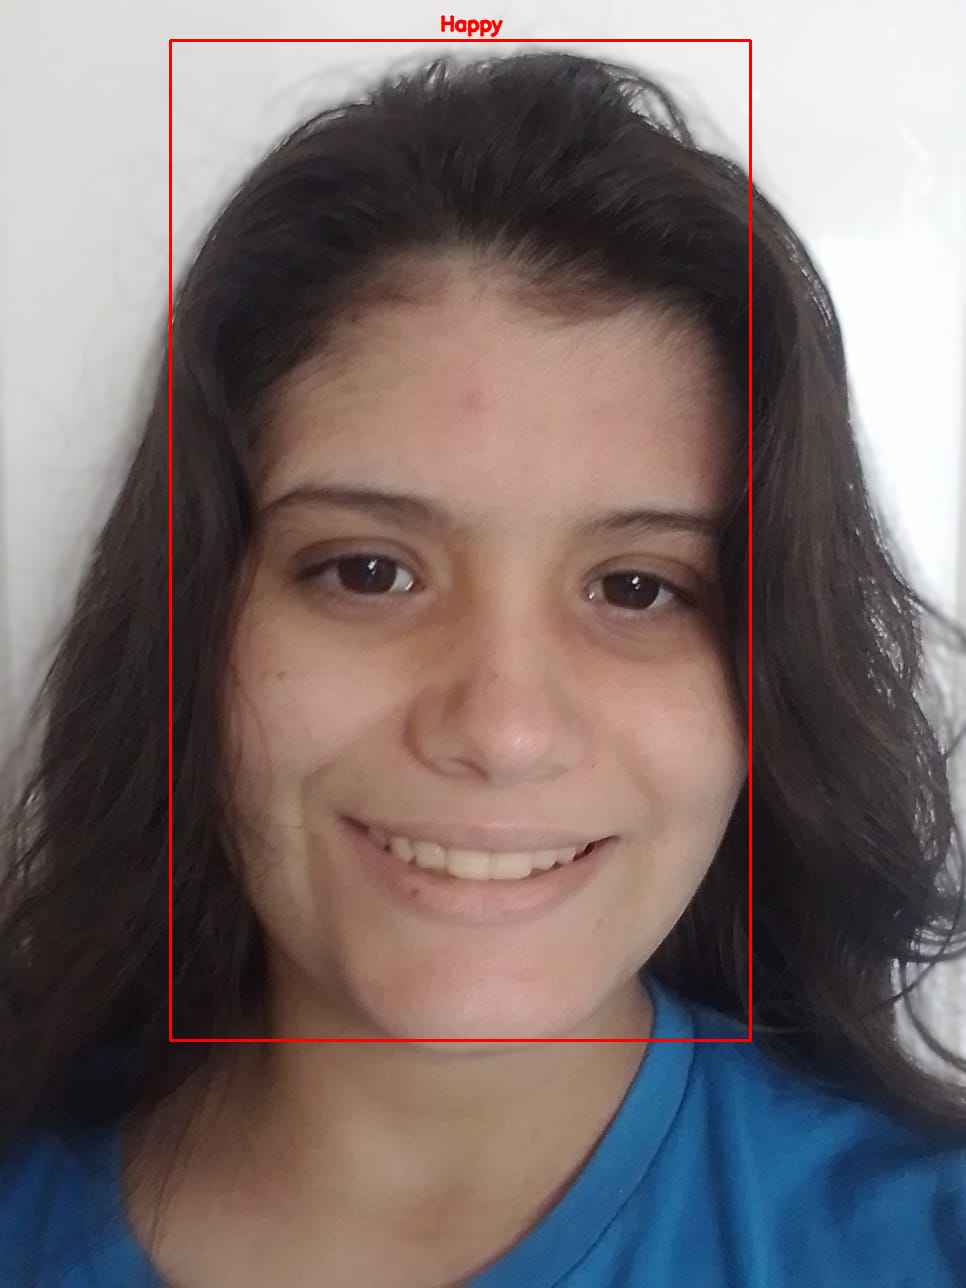

In [480]:
cv2.putText(original, label, (440, 40 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.65,
            (0, 0, 255), 2, cv2.LINE_AA)
cv2.rectangle(original, (170, 40), (170 + 580, 40 + 1000), (0, 0, 255), 2)
cv2_imshow(original)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
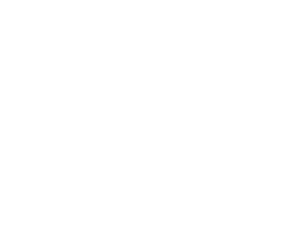

In [481]:
probability = np.ones((250, 300, 3), dtype ='uint8') * 255
probability

In [482]:
probability.shape

(250, 300, 3)

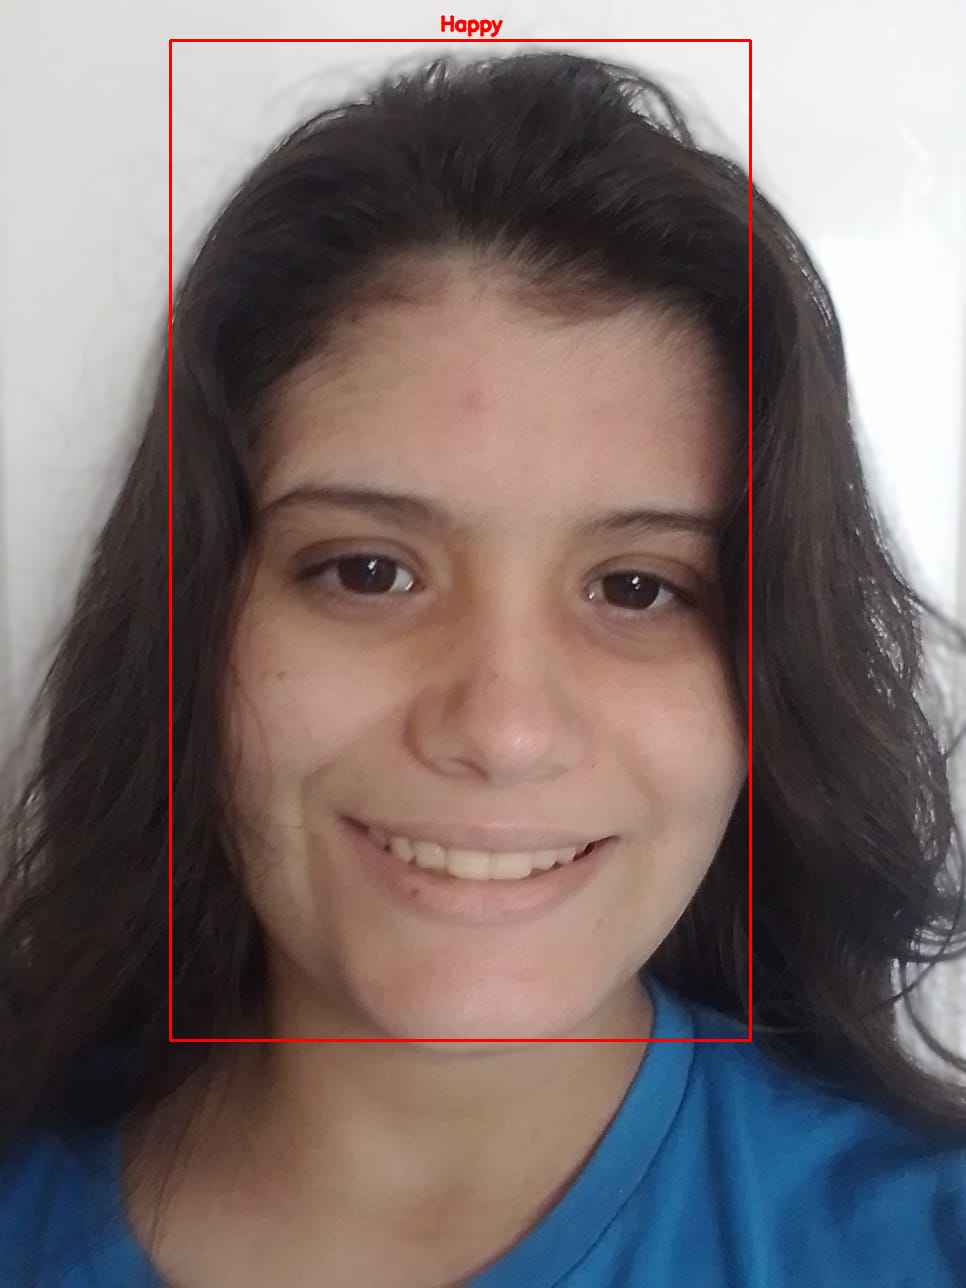

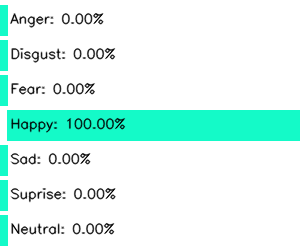

In [483]:
cv2_imshow(original)
if len(faces) == 1:
  for (i, (emotion, prob)) in enumerate(zip(expressions, preds)):
    #print(i, emotion, prob)
    text = "{}: {:.2f}%".format(emotion, prob * 100)
    w = int(prob * 300)
    cv2.rectangle(probability, (7, (i * 35) + 5), (w, (i * 35) + 35), (200, 250, 20), -1)
    cv2.putText(probability, text, (10, (i * 35) + 23), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 0), 1, cv2.LINE_AA)
cv2_imshow(probability)
